In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing

In [ ]:
df =pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# printing the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# number of rows and Columns
df.shape

(891, 12)

In [ ]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [ ]:
# drop the "Cabin" column from the dataframe
titanic_data = df.drop(columns='Cabin', axis=1)

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

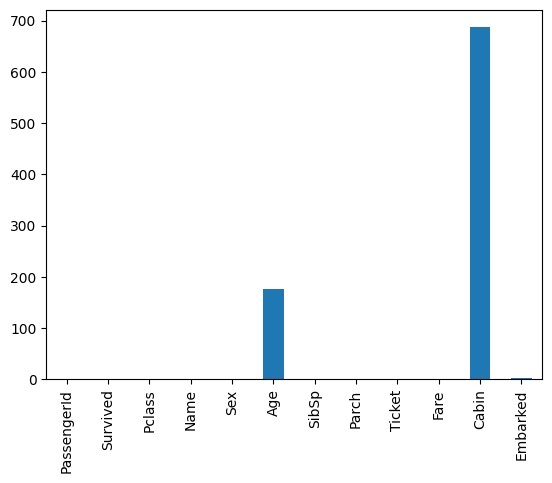

In [ ]:
#Easier to identify
#Each bar represents the count of missing values in that column
df.isna().sum().plot(kind='bar')

In [ ]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Feature Engineering

In [ ]:
#Data Encoding

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
titanic_data['Name']=encoder.fit_transform(titanic_data['Name'])
titanic_data['Sex']=encoder.fit_transform(titanic_data['Sex'])
titanic_data['Ticket']=encoder.fit_transform(titanic_data['Ticket'])
titanic_data['Fare']=encoder.fit_transform(titanic_data['Fare'])
titanic_data['Age']=encoder.fit_transform(titanic_data['Age'])
titanic_data['Embarked']=encoder.fit_transform(titanic_data['Embarked'])

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,2
1,2,1,1,190,0,52,1,0,596,207,0
2,3,1,3,353,0,34,0,0,669,41,2
3,4,1,1,272,0,48,1,0,49,189,2
4,5,0,3,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,35,0,0,101,85,2
887,888,1,1,303,0,24,0,0,14,153,2
888,889,0,3,413,0,39,1,2,675,131,2
889,890,1,1,81,1,34,0,0,8,153,0


In [ ]:
#Divide data in train test feature and target
Y = titanic_data[['Survived']]
X = titanic_data.drop(columns=['Survived'])
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,28,1,0,523,18,2
1,2,1,190,0,52,1,0,596,207,0
2,3,3,353,0,34,0,0,669,41,2
3,4,1,272,0,48,1,0,49,189,2
4,5,3,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,35,0,0,101,85,2
887,888,1,303,0,24,0,0,14,153,2
888,889,3,413,0,39,1,2,675,131,2
889,890,1,81,1,34,0,0,8,153,0


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print("X_train: ",x_train)
print("Y_train: ",y_train)
print("X_test: ",x_test)
print("Y_test: ",y_test)

X_train:       PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Embarked
298          299       1   714    1   39      0      0      98   155         2
884          885       3   793    1   33      0      0     650    12         2
247          248       2   322    0   31      0      2     166    96         2
478          479       3   425    1   28      0      0     411    21         2
305          306       1    16    1    4      1      2      37   237         2
..           ...     ...   ...  ...  ...    ...    ...     ...   ...       ...
106          107       3   724    0   27      0      0     296    24         2
270          271       1   125    1   39      0      0      47   157         2
860          861       3   325    1   56      2      0     399    92         2
435          436       1   143    0   18      1      2      33   232         2
102          103       1   858    1   27      0      1     417   212         2

[668 rows x 10 columns]
Y_train:       Su

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create normalizers
standard_scaler = StandardScaler()

X_train_standard = standard_scaler.fit_transform(x_train)
X_test_standard = standard_scaler.transform(x_test)

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,2
1,2,1,1,190,0,52,1,0,596,207,0
2,3,1,3,353,0,34,0,0,669,41,2
3,4,1,1,272,0,48,1,0,49,189,2
4,5,0,3,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,35,0,0,101,85,2
887,888,1,1,303,0,24,0,0,14,153,2
888,889,0,3,413,0,39,1,2,675,131,2
889,890,1,1,81,1,34,0,0,8,153,0


In [ ]:
print(X.shape)
print(Y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(891, 10)
(891, 1)
X and y rows are mismatched, check dataset again


Accuracy on the test set: 0.7877094972067039


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [ ]:
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
#X = vec.fit_transform(titanic_data)
vec.fit(titanic_data)
X=vec.transform(titanic_data)
X
print(X)

  (0, 5)	1
  (1, 9)	1
  (2, 6)	1
  (3, 3)	1
  (4, 7)	1
  (5, 0)	1
  (6, 8)	1
  (7, 4)	1
  (8, 10)	1
  (9, 2)	1
  (10, 1)	1


In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(),columns = vec.get_feature_names_out())

,age,embarked,fare,name,parch,passengerid,pclass,sex,sibsp,survived,ticket
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5])
X = x[:, np.newaxis]                                   #add new synthetic features to the data with polynomial feature
#y = np.array([4,1,2,3,7])
poly = PolynomialFeatures(degree = 3,include_bias = False)
x2 = poly.fit_transform(X)
print(x)
print(x2)

[1 2 3 4 5]
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


In [ ]:
#SMOTE

#!pip install imblearn

from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state = 42)
x_train_new,y_train_new = sm.fit_resample(x_train,y_train)
y_train.value_counts()

Survived
0           444
1           268
dtype: int64

In [ ]:
y_train_new.value_counts()

Survived
0           444
1           444
dtype: int64

ML Techniques

Accuracy : 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



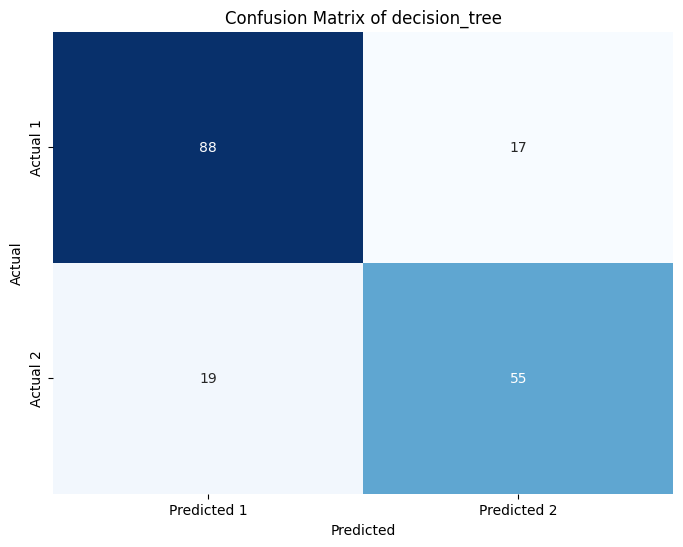

In [ ]:
# 1] Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Create and train Decision Tree models
decision_tree_standard = DecisionTreeClassifier(random_state=42)
decision_tree_standard.fit(x_train, y_train)

# Make predictions using Decision Tree
predictions_decision_tree = decision_tree_standard.predict(x_test)

# Evaluate accuracy on test data
accuracy_standard = accuracy_score(y_test, predictions_decision_tree)
#Confusion matrix

cm = confusion_matrix(y_test, predictions_decision_tree)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 1", "Predicted 2"],
            yticklabels=["Actual 1", "Actual 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("Accuracy :", accuracy_standard)

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions_decision_tree))
# print Confusion Matrix
plt.title("Confusion Matrix of decision_tree")
plt.show()

Naive Bayes Accuracy: 0.776536312849162
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       105
           1       0.69      0.84      0.76        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.77       179
weighted avg       0.79      0.78      0.78       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


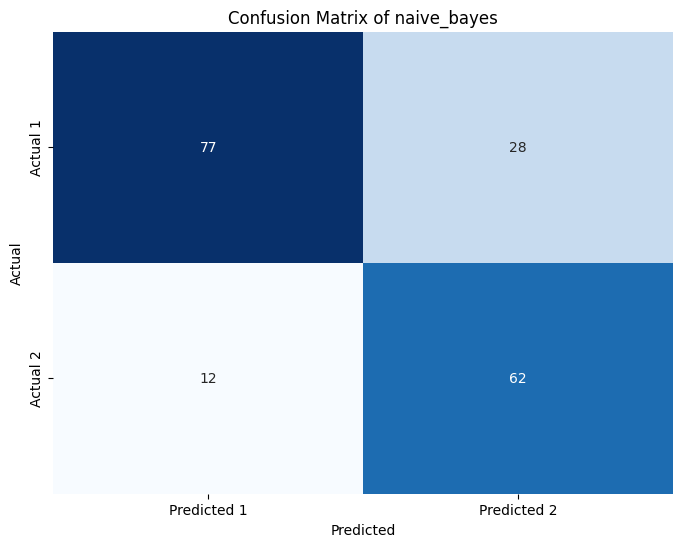

In [ ]:
# 2] Bayesian Classification

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Create and train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

# Make predictions using Naive Bayes
predictions_naive_bayes = naive_bayes.predict(x_test)

# Calculate accuracy for Naive Bayes
accuracy_naive_bayes = accuracy_score(y_test, predictions_naive_bayes)

cm = confusion_matrix(y_test, predictions_naive_bayes)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 1", "Predicted 2"],
            yticklabels=["Actual 1", "Actual 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")


print("Naive Bayes Accuracy:", accuracy_naive_bayes)

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions_naive_bayes))

# print Confusion Matrix
plt.title("Confusion Matrix of naive_bayes")
plt.show()


<ipython-input-220-2168166ff6c3>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(x_train, y_train)


 Random Forest Accuracy: 0.8435754189944135
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



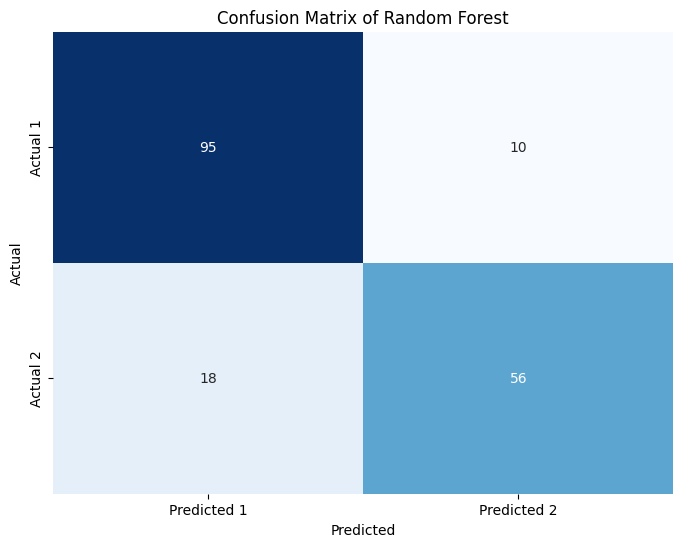

In [ ]:
# 3] Random Forest

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest_classifier.fit(x_train, y_train)

# Make predictions on the test data
predictions_random_forest = random_forest_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_random_forest)

cm = confusion_matrix(y_test, predictions_random_forest)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 1", "Predicted 2"],
            yticklabels=["Actual 1", "Actual 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(" Random Forest Accuracy:", accuracy )

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions_random_forest))

# print Confusion Matrix
plt.title("Confusion Matrix of Random Forest")
plt.show()


Logistic Regression Accuracy : 0.7877094972067039
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


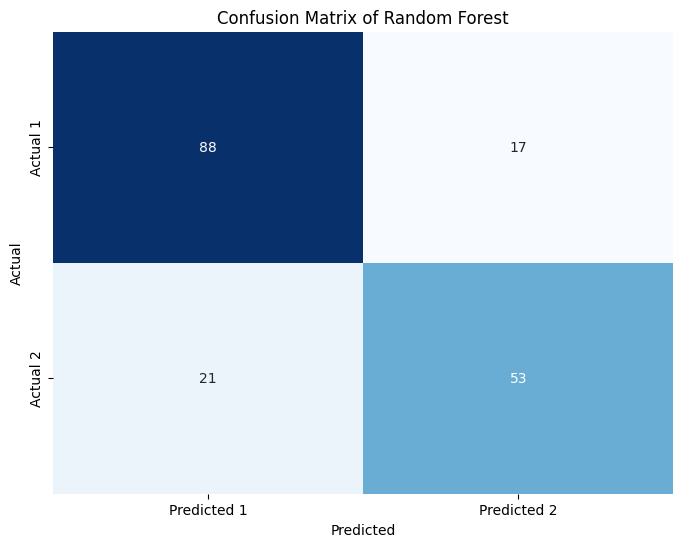

In [ ]:
# 4] Logistic Regression
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_regression_model.fit(x_train, y_train)

# Make predictions on the test data
predictions = logistic_regression_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

cm = confusion_matrix(y_test, predictions)
cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 1", "Predicted 2"],
            yticklabels=["Actual 1", "Actual 2"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

print("Logistic Regression Accuracy :", accuracy)

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

# print Confusion Matrix
plt.title("Confusion Matrix of Random Forest")
plt.show()



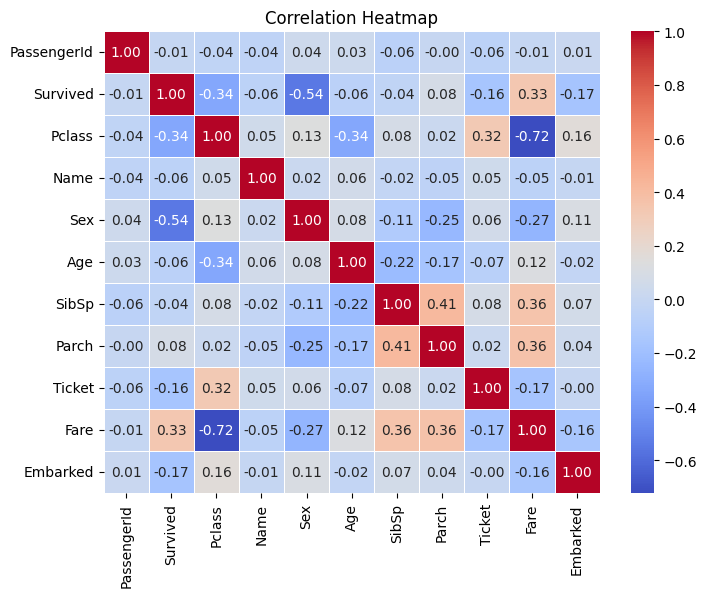

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)
data = np.random.rand(10, 5)  # 10 rows, 5 columns

# Compute the correlation matrix
correlation_matrix = titanic_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


CV and Performance Measurement, Comparative Analysis

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(logistic_regression_model, x_train, y_train, cv=5, scoring='accuracy')
#The model used is logistic regression

# Print cross-validation results
print("Cross-validation scores:")
print(cv_scores)
print("accuracy", cv_scores)

#Mean
print("Mean Accuracy",cv_scores.mean())

# Train and evaluate the model on the test set
logistic_regression_model.fit(x_train, y_train)
predictions = logistic_regression_model.predict(x_test)

# Print the results on the test set
print("\nAccuracy on the test set:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Cross-validation scores:
[0.8041958  0.81118881 0.76056338 0.73239437 0.81690141]
accuracy [0.8041958  0.81118881 0.76056338 0.73239437 0.81690141]
Mean Accuracy 0.7850487540628386

Accuracy on the test set: 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Comparative Anaylsis of ML techniques

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Defining models of Decision Tree, Random forest, Bayesian, Logistic regression
decision_tree_standard = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
naive_bayes = GaussianNB()
logistic_regression_model = LogisticRegression(random_state=42)

# Perform k-fold cross-validation (e.g., k=5) for each model
cv_scores_decision_tree = cross_val_score(decision_tree_standard, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_random_forest = cross_val_score(random_forest_classifier, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_naive_bayes = cross_val_score(naive_bayes, x_train, y_train, cv=5, scoring='accuracy')
cv_scores_logistic_regression = cross_val_score(logistic_regression_model, x_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results for each model
print("Cross-validation scores for Decision Tree:")
print(cv_scores_decision_tree)
print("Mean accuracy: ", cv_scores_decision_tree.mean())

print("\nCross-validation scores for Random Forest:")
print(cv_scores_random_forest)
print("Mean accuracy: ",cv_scores_random_forest.mean())

print("\nCross-validation scores for Naive Bayes:")
print(cv_scores_naive_bayes)
print("Mean accuracy: ", cv_scores_naive_bayes.mean())

print("\nCross-validation scores for Logistic Regression:")
print(cv_scores_logistic_regression)
print("Mean accuracy: ", cv_scores_logistic_regression.mean())

# Train and evaluate models on the test set
decision_tree_standard.fit(x_train, y_train)
random_forest_classifier.fit(x_train, y_train)
naive_bayes.fit(x_train, y_train)
logistic_regression_model.fit(x_train, y_train)

decision_tree_predictions = decision_tree_standard.predict(x_test)
random_forest_predictions = random_forest_classifier.predict(x_test)
naive_bayes_predictions = naive_bayes.predict(x_test)
logistic_regression_predictions = logistic_regression_model.predict(x_test)

# Print the results on the test set for each model
print("\nDecision Tree:")
print("Accuracy on the test set:", accuracy_score(y_test, decision_tree_predictions))
print("Classification Report:\n", classification_report(y_test, decision_tree_predictions))

print("\nRandom Forest:")
print("Accuracy on the test set:", accuracy_score(y_test, random_forest_predictions))
print("Classification Report:\n", classification_report(y_test, random_forest_predictions))

print("\nNaive Bayes:")
print("Accuracy on the test set:", accuracy_score(y_test, naive_bayes_predictions))
print("Classification Report:\n", classification_report(y_test, naive_bayes_predictions))

print("\nLogistic Regression:")
print("Accuracy on the test set:", accuracy_score(y_test, logistic_regression_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_regression_predictions))




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-validation scores for Decision Tree:
[0.79020979 0.72727273 0.78169014 0.72535211 0.76760563]
Mean accuracy:  0.7584260809612923

Cross-validation scores for Random Forest:
[0.83216783 0.85314685 0.82394366 0.76760563 0.84507042]
Mean accuracy:  0.824386880724909

Cross-validation scores for Naive Bayes:
[0.77622378 0.74125874 0.80985915 0.73943662 0.74647887]
Mean accuracy:  0.7626514330739683

Cross-validation scores for Logistic Regression:
[0.8041958  0.81118881 0.76056338 0.73239437 0.81690141]
Mean accuracy:  0.7850487540628386

Decision Tree:
Accuracy on the test set: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Random Forest:
Accuracy on the test set: 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Analysis of Bias and Variance of ML techniques

In [ ]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,28,1,0,523,18,2
1,2,1,1,190,0,52,1,0,596,207,0
2,3,1,3,353,0,34,0,0,669,41,2
3,4,1,1,272,0,48,1,0,49,189,2
4,5,0,3,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,35,0,0,101,85,2
887,888,1,1,303,0,24,0,0,14,153,2
888,889,0,3,413,0,39,1,2,675,131,2
889,890,1,1,81,1,34,0,0,8,153,0


In [ ]:
#BIAS VARAINCE
# ! pip install mlxtend            --- for jupyter nb
# estimate the bias and variance for a regresion model

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

# separate into inputs and outputs
data = titanic_data.values
X,y = data[:,:-1], data[:,-1]

#split the data into train anhd test
X_train, X_test,y_train, y_test = train_test_split(X ,y ,test_size =0.33, random_state=1)

# define the model
model = LinearRegression()

# estimate bias and variance
mse, bias, var = bias_variance_decomp(model,X_train,y_train, X_test, y_test, loss ='mse', num_rounds=200, random_seed = 1)     # num_rounds=200 --- check the bias for 200 samples



In [ ]:
# summarize the results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f'%var)

MSE: 0.674
Bias: 0.662
Variance: 0.012


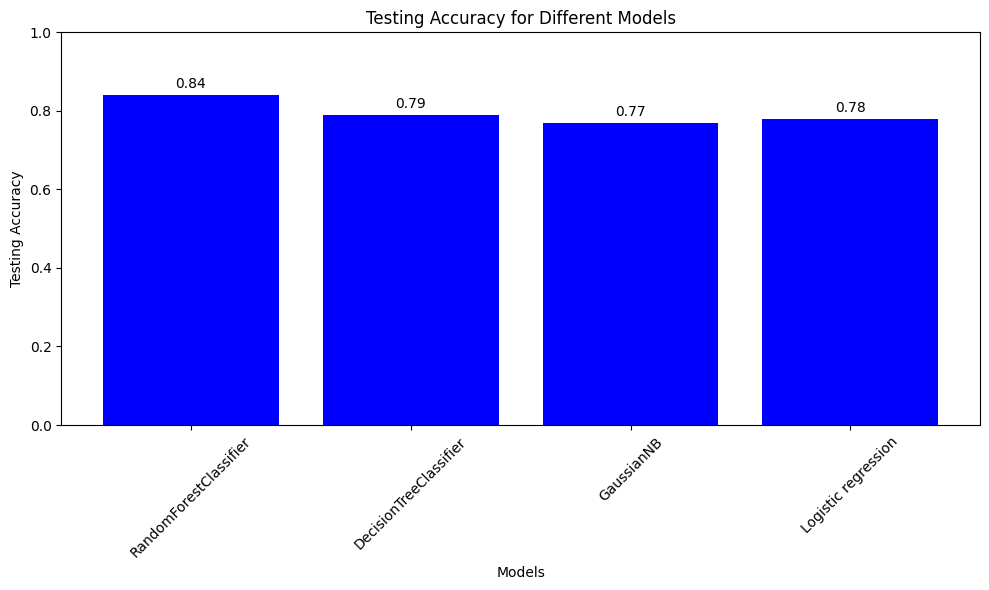

In [ ]:
#TESTED ACCURACIES FOR DIFFERENT MODEL
import matplotlib.pyplot as plt

# List of model names
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'Logistic regression']

# List of testing accuracy values for each model (replace with your actual values)
accuracy_values = [0.84, 0.79, 0.77, 0.78]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for Different Models')
plt.ylim(0.0, 1.0)  # Set the y-axis limits between 0 and 1 (assuming accuracy is in the range [0, 1])

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the bar graph
plt.tight_layout()
plt.show()